In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.tree import DecisionTreeRegressor

from warnings import filterwarnings
filterwarnings("ignore")

### CART (Classification and Regression Tree)

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()

#one-hot encoding
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"]) # 2 değişken seçtik

#### Model ve Tahmin

In [4]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [5]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

Text(0, 0.5, 'Maaş (Salary)')

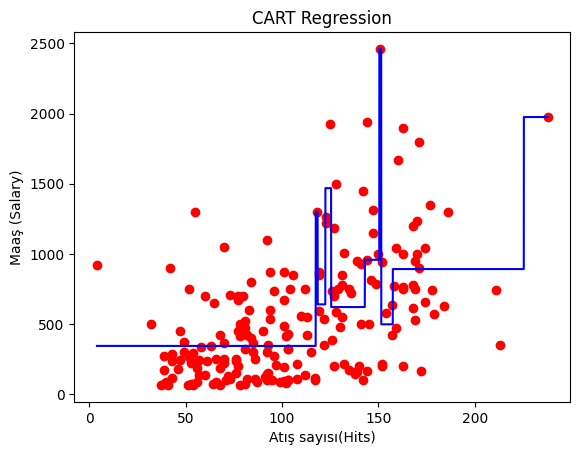

In [6]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train, y_train, color = "r")

plt.plot(X_grid, cart_model.predict(X_grid), color = "b")
plt.title("CART Regression")
plt.xlabel("Atış sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [7]:
# tahmin
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [8]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [9]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()

#one-hot encoding
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [10]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [11]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

482.0591176835403

#### Model Tuning

In [12]:
cart_model

DecisionTreeRegressor()

In [13]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

466.9376310515142

In [14]:
cart_params = {"max_depth": [2,3,4,5,10,20],
               "min_samples_split": [2, 10, 5, 30, 50, 100]}

In [15]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [16]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [17]:
# final model
cart_tuned = DecisionTreeRegressor(max_depth=4, min_samples_split=50).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434